---model_0: training complete---
---model_1: training complete---


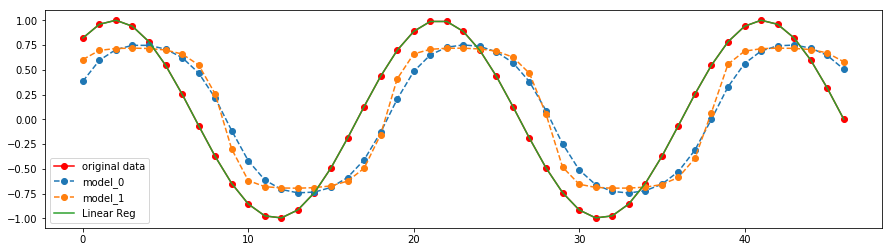

In [122]:
"""
- 일단 RNN을 만들기 전에, 내가 만들려고 하는 것이 (many or one) to (many or one) 중에서 무엇인지 알아야 함
- 간단한 시계열 값을 예측한다고 할 때, 이전 data 3개를 가지고, 1개의 값을 예측한다면, many to one의 형태가 되겠다. 
"""
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.linear_model import LinearRegression

s = np.sin(2 * np.pi * 0.125 * np.linspace(0, 20, 50))

timestep =3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측한다. 
xs, ys = [], []

for i in range(timestep, len(s)):
    xs.append(np.array([s[i-j] for j in range(timestep, 0, -1)]))
    ys.append(s[i])
xs, ys = np.array(xs).reshape(len(xs), 3, 1), np.array(ys).reshape(len(ys), 1)

## 이제 rnn에 적용해 봅시다. 
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

"""
RNN에는 x 데이터가 (n_sample, time step, x vector의 크기)로 들어가야 함 
- n_sample: sample의 수 
- time step: t-n 에서 n이 몇인가를 묻는 것
- x vector의 크기: 현재는 1개짜리지만, 여러 값이 들어오고, 여러 값을 한번에 예측해야 할 경우도 있음. 
    - 그리고 xvector의 크기는 yvector의 크기과 같아야 함(당연)
"""
## benchmark model: Linear Regression
reg  = LinearRegression()
reg.fit(xs.reshape(len(xs), 3), ys)

## simple RNN model 
np.random.seed(0)# seed 고정
models = [#simpleRNN에서 units은 해당 cell의 결과로 나오는 dim을 말함. 
    Sequential([SimpleRNN(units=1, input_shape=(3, 1)),
    ]), 
    Sequential([SimpleRNN(units=1, input_shape=(3, 1)),
                Dense(10, activation='linear'), 
                Dense(1, activation='linear'), 
    ]),
]

for i, m in enumerate(models):
    m.compile(loss='mse', optimizer='sgd')
    history = m.fit(xs, ys, epochs=150, verbose=0)
    print("---model_{}: training complete---".format(i))

## 그림을 그립시다. 
fig = plt.figure(figsize=(15, 4)) 
plt.plot(s[3:], 'ro-', label='original data')# 원래 plot, 앞의 3칸의 경우, 
for i, m in enumerate(models):
    plt.plot(m.predict(xs), '--', marker='o', label='model_{}'.format(i))
plt.plot(reg.predict(xs.reshape(len(xs), 3)), label='Linear Reg')
plt.legend()

plt.savefig('../../assets/images/markdown_img/180620_1538_simple_rnn.svg')
plt.show()



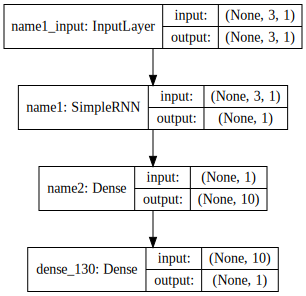

In [145]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

from IPython.display import SVG #jupyter notebook에서 보려고 
from keras.utils.vis_utils import model_to_dot # keras model을 dot language로 변환

model1 = Sequential([
    # 원래는 Input layer도 있으면 좋지만, 없어도 알아서 자동으로 만들어줍니다. 
    SimpleRNN(units=1, input_shape=(3, 1), name='name1'),
    Dense(10, activation='linear', name='name2'), 
    Dense(1, activation='linear'), 
    ])

model_dot = model_to_dot(model1, show_shapes=True)
# 파일로 저장하기 
model_dot.write('../../assets/images/markdown_img/180620_nn_to_dot.svg', prog=None, format='raw', encoding=None)
# jupyter notebook에서 보기 위함
SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

In [131]:
from keras.utils import plot_model

plot_model(model1)
plt.show()